## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [2]:
path = r'C:\Users\gav\Documents\Career Foundry Data Analytics\Section 4 - Python in Data Analytics\Project - Insatacart'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_product_merged.pkl'))

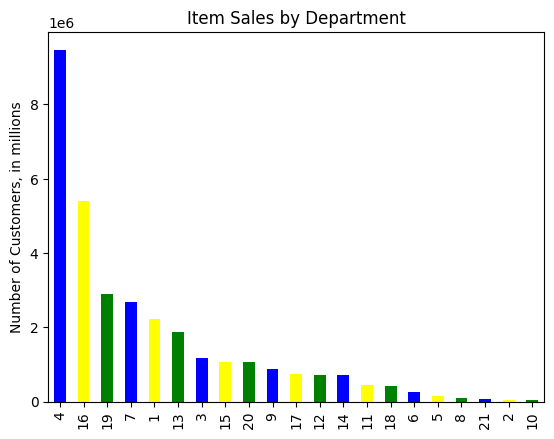

In [6]:
pop_items_bar = df['department_id'].value_counts().plot.bar(color = ['blue', 'yellow', 'green'])
plt.ylabel('Number of Customers, in millions')
plt.title('Item Sales by Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pop_items_bar.png'))

In [9]:
#Creating the crosstab
df_age_region = pd.crosstab(df['department_id'], df['loyalty_flag'], dropna = False)

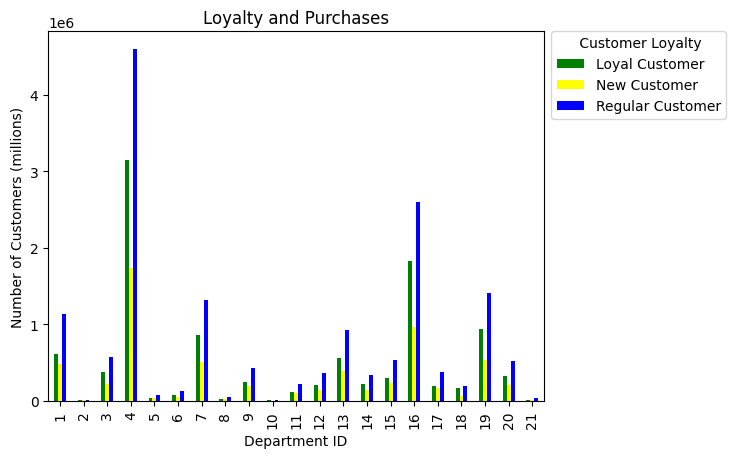

In [10]:
age_region = df_age_region.plot(kind = 'bar', color= ['green', 'yellow', 'blue',])
plt.title('Loyalty and Purchases')
age_region.legend(title=' Customer Loyalty', bbox_to_anchor = (1, 1.02), loc='upper left', labels=['Loyal Customer', 
                                                                                                   'New Customer', 'Regular Customer'])
plt.ylabel('Number of Customers (millions)')
plt.xlabel('Department ID')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_department_bar.png'))

In [ ]:
region_purch_bar = df['region'].value_counts().plot.bar(color = ['blue', 'yellow', 'green'])
plt.ylabel('Number of Customers, in millions')
plt.title('Item Sales by Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pop_items_bar.png'))

In [5]:
df.shape

(32404859, 24)

In [4]:
df.head()

order_id  user_id  num_of_purchases  orders_day_of_week  order_hour_of_day  \
0   2539329        1                 1                   2                  8   
1   2398795        1                 2                   3                  7   
2    473747        1                 3                   3                 12   
3   2254736        1                 4                   4                  7   
4    431534        1                 5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...    price_range_loc     busiest_day  busiest_days  \
0         Soda  ...  Mid-range product  Regularly busy   Regular day   
1         Soda  ...  Mid-range product  Regularly busy  Slowest days   
2         Soda  ...  Mid-range product  Regularly busy  Slowest days   
3         Soda  ...  Mid-range product      Least busy  Slowest days   
4         Soda  ...  Mid-range product      Least busy  Slowest days   

  busiest_period_of_day max_order  loyalty_flag avg_spending      spender  \
0        Average orders        10  New customer     6.367797  Low spender   
1        Average orders        10  New customer     6.367797  Low spender   
2        Average orders        10  New customer     6.367797  Low spender   
3        Average orders        10  New customer     6.367797  Low spender   
4           Most orders        10  New customer     6.367797  Low spender   

   purchase_frequency frequent_customer  
0           18.542373  Regular customer  
1           18.542373  Regular customer  
2           18.542373  Regular customer  
3           18.542373  Regular customer  
4           18.542373  Regular customer  

[5 rows x 24 columns]

## Bar Charts

<Axes: >

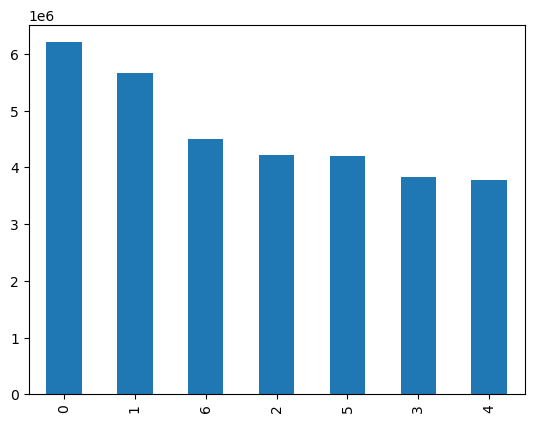

In [5]:
# This will create a bar chart showing the frequency of the order_day_of_week column
df['orders_day_of_week'].value_counts().plot.bar()

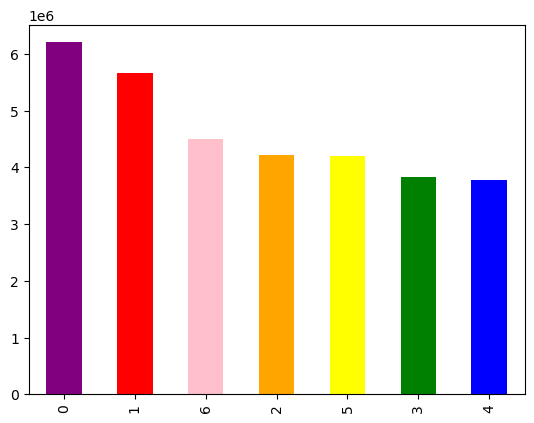

In [6]:
# Adding color
bar = df['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

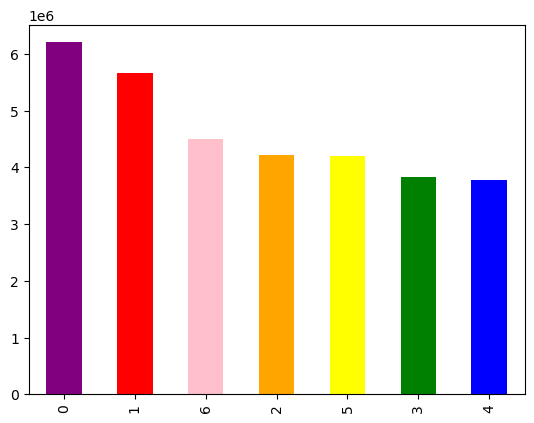

In [7]:
# Testing the figure function
bar.figure

In [ ]:
# exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Creating a Histogram

#### Note:
The next two sections included some data that was fixed in later parts of this exercise,
should the code be ran again the results will be different for everything from code block
9 to 11. Some of the code has been turned into markdowns to prevent it from running again

<Axes: ylabel='Frequency'>

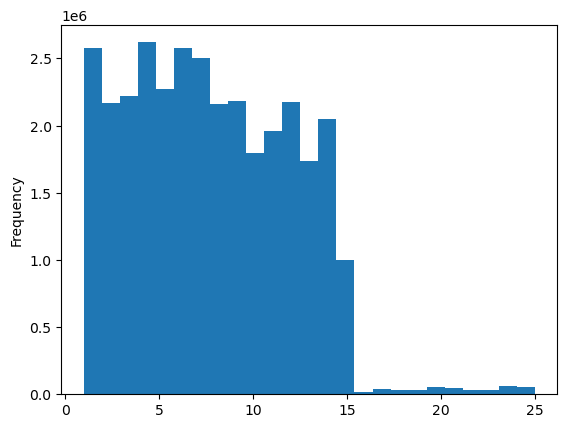

In [8]:
df['prices'].plot.hist(bins = 25)

After performing a describe() function it was found that the max price was $99,999.00
Due to this outlier the histogram has pushed all the bins into one section
To better check this we created a scatterplot.

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

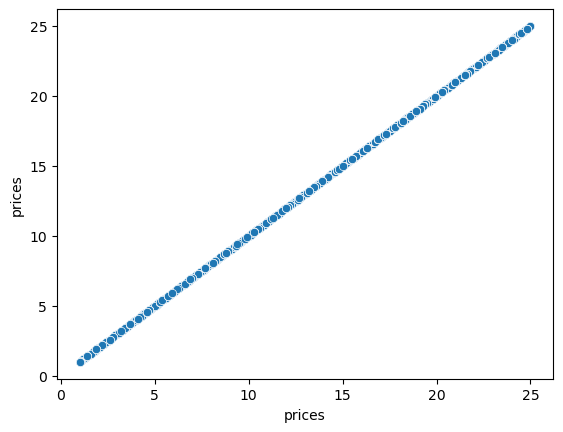

In [9]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

### Note: this was resolved in the previously mentioned script

Checking on the large prices from the scatterplot
df.loc[df['prices'] > 100]

Based on this it looks like there are two products (id 21553 and 33664) that have the wrong price.
Ordinarily the next step would be to check with the provider of the data on these prices.
In this case we are going to transform these products to have a NaN price:

df.loc[df['prices'] > 100, 'prices'] = np.nan

df.loc[df['prices'] > 100, 'prices'] = np.nan

To check the work
df['prices'].max()

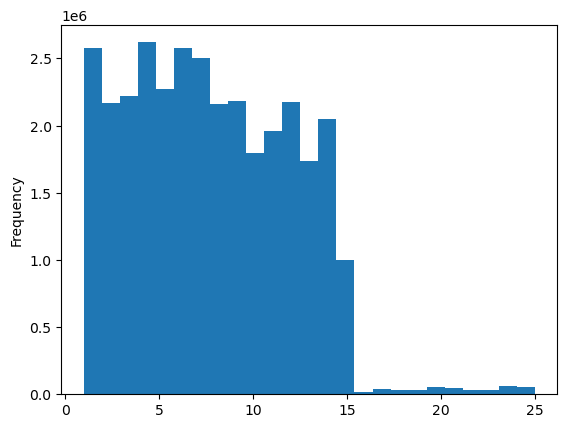

In [10]:
# To turnt he histogram into an object
hist = df['prices'].plot.hist(bins = 25)

I spent two hours unsuccessfully trying to fix the df in the previous exercise to eliminate the outliers,
so I am just going to fix it here and hope that this will be good enough going forward.

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_product_merged.pkl'))

I am transforming the previous code into a markdown, since in theory it should resolve
the issue discovered in an earlier step. This feels like trying to fix time-
travel issues and is just as confusing.

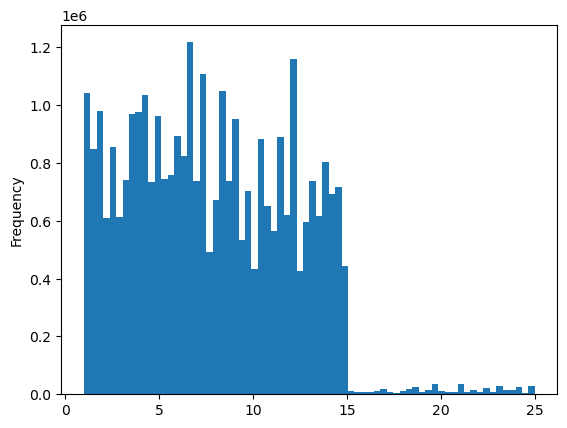

In [11]:
# The above graph could be made more granular, so let's do it!
hist = df['prices'].plot.hist(bins = 70)

In [12]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## Creating a Sample Before Creating a Line Chart

In [14]:
# Since the data is very large it would be computer-crashing to try and
# create a line chart with all of the unique prices
# to prevent a meltdown we must instead create a seed and a random
# number to assign to each row
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

The above code created a seed of random numbers between 0 and 1
and assigned a number to each row in the df, since we are looking
for a 70/30 split in the data, any row that has .7 or less as their
row number will be placed into the control group (in this case dev)

In [15]:
# checking the dev
dev

array([False,  True, False, ...,  True,  True,  True])

The code has now split the data into a boolean with those <= .7 being True and the rest being false

In [16]:
# With the data now split into two groups we need to name them
big = df[dev]
small = df[~dev]

In [17]:
# Let's check the size of these groups
len(df)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
# To further speed the process we will create a new df with only the columns we need for the chart
df_2 = small[['orders_day_of_week', 'prices']]

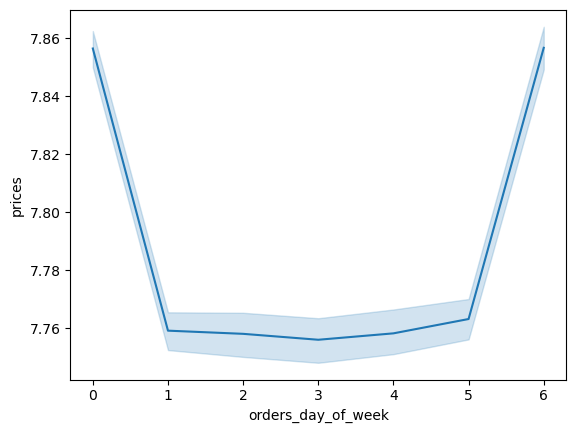

In [20]:
# Now we finally make the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')